In [1]:
import utils


config = utils.config_tests["breast"]["net"]
model = utils.models["net"]
model = model(config=config).to("mps")

# calculate nummber of parameters
num_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {num_params}")


Number of parameters: 304221


In [9]:
config = utils.config_tests["mnist"]["predictor"]
model = utils.models["predictor"]
model = model(config=config).to("mps")

# calculate nummber of parameters
num_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {num_params}")

Number of parameters: 726211


In [2]:
# calculate nummber of parameters
num_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {num_params}")

Number of parameters: 291522


In [14]:
x = np.load('data/train_features_FL.npy')
y = np.load('data/train_tasks_FL.npy')

In [15]:
x.shape

(60000, 1000)

In [3]:
import numpy as np
import pandas as pd

## reading cifar10
# CIFAR10
x = np.load('data/train_features_cifar10.npy')
y = np.load('data/train_tasks_cifar10.npy')
# pick random 10000 indexes
idx = np.random.choice(x.shape[0], 10000, replace=False)
x = x[idx]
y = y[idx]
# create a unique dataset, with y=Labels and x=Features from 1 to 1000
df_CIFAR10 = pd.DataFrame(x, columns=[str(i) for i in range(1000)])
df_CIFAR10['Labels'] = y
df_CIFAR10 = df_CIFAR10.sample(frac=1).reset_index(drop=True)
    
XXXXX = df_CIFAR10.drop('Labels', axis=1)
min_values_cifar10 = XXXXX.min().values
max_values_cifar10 = XXXXX.max().values
print(f"Min values CIFAR10: {min(min_values_cifar10)}")
print(f"Max values CIFAR10: {max(max_values_cifar10)}")

Min values CIFAR10: -11.886337280273438
Max values CIFAR10: 24.897098541259766


In [5]:
XXXXX.max().values

array([10.423042 , 12.600371 ,  8.072652 ,  9.027553 , 12.251503 ,
        9.412625 ,  4.374051 ,  8.022254 ,  8.820903 , 14.572547 ,
       18.415415 , 11.8148775, 10.213047 , 12.746513 , 10.198513 ,
        9.072144 , 14.926754 ,  9.434887 , 10.594098 , 10.808314 ,
       11.800672 , 15.662813 , 12.325638 , 10.182576 , 10.051552 ,
       10.429396 , 12.341191 , 10.919868 , 11.383953 ,  9.62078  ,
       12.641973 , 11.7588215, 18.605917 ,  8.232991 ,  8.178155 ,
       10.142697 ,  9.711519 ,  8.018498 , 11.993644 ,  7.7086954,
       10.10922  , 10.69895  , 10.827294 , 12.934413 ,  8.068943 ,
        6.800266 ,  8.450273 , 12.084829 ,  5.7050962,  8.13478  ,
        4.6484833, 12.340337 ,  8.344975 ,  7.455947 ,  7.0156026,
        9.782901 ,  6.773877 ,  7.98915  ,  5.2508674, 14.677648 ,
        9.556901 ,  9.972726 , 14.440763 , 10.136069 , 14.389955 ,
        8.17452  , 10.531808 ,  6.106569 , 11.706444 ,  6.6199045,
        7.1996427, 13.72882  ,  7.495158 , 15.475789 ,  7.8043

In [19]:
import os.path
import os
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.models import resnet18, ResNet18_Weights
import numpy as np
from tqdm import tqdm

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the image
])

# Creating the custom dataset
class CustomDSpritesDataset(torch.utils.data.Dataset):
    def __init__(self, data, transform=None):
        self.dataset = data
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image = self.dataset[idx][0]
        target_label = self.dataset[idx][1]
        
        if self.transform:
            image = self.transform(image)
            image = preprocess(image)

        return image, torch.tensor(target_label, dtype=torch.float32)
    
# # Creating the custom dataset
# class CustomDSpritesDataset(torch.utils.data.Dataset):
#     def __init__(self, data):
#         self.dataset = data

#     def __len__(self):
#         return len(self.dataset)

#     def __getitem__(self, idx):
#         image = self.dataset[idx][0]
#         target_label = self.dataset[idx][1]

#         return image, torch.tensor(target_label, dtype=torch.float32)



# Step 1: Prepare the MNIST dataset
# [Include the CustomMNISTDataset class from the previous code snippet here]

# Load dSprites dataset
# load np arrays
data = datasets.CIFAR10(root=os.path.expanduser("~/.cache"), download=True, train=True, transform=None)

# DataLoaders
train_loader = DataLoader(custom_train_dataset, batch_size=64, shuffle=True)

# Step 2: Prepare ResNet18 model for feature extraction
model = resnet18(weights=ResNet18_Weights.DEFAULT)
model.eval()  # Set the model to evaluation mode

weights = ResNet18_Weights.DEFAULT
preprocess = weights.transforms()

# Create custom datasets
custom_train_dataset = CustomDSpritesDataset(data, transform=preprocess)

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Step 3: Extract features
def extract_features(data_loader):
    features = []
    task_labels = []

    with torch.no_grad():
        for imgs, tasks in tqdm(data_loader):
            imgs = imgs.to(device)
            out = model(imgs)
            features.append(out.cpu().numpy())
            task_labels.append(tasks.numpy())

    return np.concatenate(features), np.concatenate(task_labels)

train_features, train_tasks = extract_features(train_loader)

# Step 4: Save the embeddings and labels
np.save('train_features.npy', train_features)
np.save('train_tasks.npy', train_tasks)





Files already downloaded and verified


  0%|          | 2/782 [00:04<26:43,  2.06s/it]


KeyboardInterrupt: 

In [1]:
import os
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import numpy as np
from tqdm import tqdm
from torchvision.models import resnet18, ResNet18_Weights


# Load CIFAR10 dataset
data = datasets.CIFAR10(root=os.path.expanduser("~/.cache"), download=True, train=True, transform=None)

# Step 2: Prepare ResNet18 model for feature extraction
model = resnet18(weights=ResNet18_Weights.DEFAULT)
model.eval()  # Set the model to evaluation mode

weights = ResNet18_Weights.DEFAULT
preprocess = weights.transforms()

# Creating the custom dataset
class CustomDSpritesDataset(torch.utils.data.Dataset):
    def __init__(self, data, transform=None):
        self.dataset = data
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image = self.dataset[idx][0]
        target_label = self.dataset[idx][1]
        
        if self.transform:
            image = preprocess(image)

        return image, torch.tensor(target_label, dtype=torch.float32)

# Create custom datasets
custom_train_dataset = CustomDSpritesDataset(data, transform=preprocess)

# DataLoaders
train_loader = DataLoader(custom_train_dataset, batch_size=64, shuffle=True)

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "mps"
model = model.to(device)

# Step 3: Extract features
def extract_features(data_loader):
    features = []
    task_labels = []

    with torch.no_grad():
        for imgs, tasks in tqdm(data_loader):
            imgs = imgs.to(device)
            out = model(imgs)
            features.append(out.cpu().numpy())
            task_labels.append(tasks.numpy())

    return np.concatenate(features), np.concatenate(task_labels)

train_features, train_tasks = extract_features(train_loader)

# Step 4: Save the embeddings and labels
np.save('data/train_features_cifar10.npy', train_features)
np.save('data/train_tasks_cifar10.npy', train_tasks)

Files already downloaded and verified


100%|██████████| 782/782 [01:06<00:00, 11.84it/s]


In [14]:
# count the number of parameters of resnet18
model = resnet18(weights=ResNet18_Weights.DEFAULT)
num_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {num_params}")

Number of parameters: 11689512


In [1]:
    import utils
    import torch
   
    # model and history folder
    model = utils.models["net"]
    train_fn = utils.trainings["net"]
    evaluate_fn = utils.evaluations["net"]
    plot_fn = utils.plot_functions["net"]
    config = utils.config_tests["cifar10"]["net"]
    loss_fn = torch.nn.CrossEntropyLoss()

    # check if metrics.csv exists otherwise delete it
    utils.check_and_delete_metrics_file(config['history_folder'] + f"client_{"2cluster"}_{"1"}", question=False)

    # check gpu and set manual seed
    device = utils.check_gpu(manual_seed=True)

    # load data
    X_train, y_train, X_val, y_val, X_test, y_test, num_examples = utils.load_data(
        client_id=str("1"), device=device, type="2cluster", dataset="cifar10")

    # Model
    model = model(config=config).to(device)

    # Optimizer and Loss function
    optimizer = torch.optim.SGD(model.parameters(), lr=config["learning_rate"], momentum=0.9)

MPS is available


In [6]:
model_trained, train_loss, val_loss, acc, acc_prime, acc_val, _ = train_fn(
                model, loss_fn, optimizer, X_train, y_train, 
                X_val, y_val, n_epochs=100, print_info=False, config=config)

Epoch   10 / 100, Cost : 6.2459, Acc : 92.02 %, Validity : 9.13 %, Val Cost : 0.2383, Val Acc : 98.48 % , Val Validity : 3.03 %
Epoch   20 / 100, Cost : 5.8245, Acc : 97.72 %, Validity : 9.13 %, Val Cost : 0.1174, Val Acc : 95.45 % , Val Validity : 3.03 %
Epoch   30 / 100, Cost : 5.6180, Acc : 98.48 %, Validity : 10.27 %, Val Cost : 0.0862, Val Acc : 98.48 % , Val Validity : 6.06 %
Epoch   40 / 100, Cost : 5.4067, Acc : 98.48 %, Validity : 13.31 %, Val Cost : 0.0728, Val Acc : 98.48 % , Val Validity : 3.03 %
Epoch   50 / 100, Cost : 5.2624, Acc : 99.24 %, Validity : 9.89 %, Val Cost : 0.0652, Val Acc : 98.48 % , Val Validity : 4.55 %
Epoch   60 / 100, Cost : 5.0947, Acc : 99.24 %, Validity : 7.98 %, Val Cost : 0.0575, Val Acc : 98.48 % , Val Validity : 10.61 %
Epoch   70 / 100, Cost : 4.9487, Acc : 99.24 %, Validity : 11.03 %, Val Cost : 0.0575, Val Acc : 96.97 % , Val Validity : 9.09 %
Epoch   80 / 100, Cost : 4.8610, Acc : 99.62 %, Validity : 11.41 %, Val Cost : 0.0583, Val Acc : 96.

In [5]:
import numpy as np
import torch
torch.nn.functional.one_hot(torch.tensor(np.random.randint(0, 9, size=20)), num_classes=10)

tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

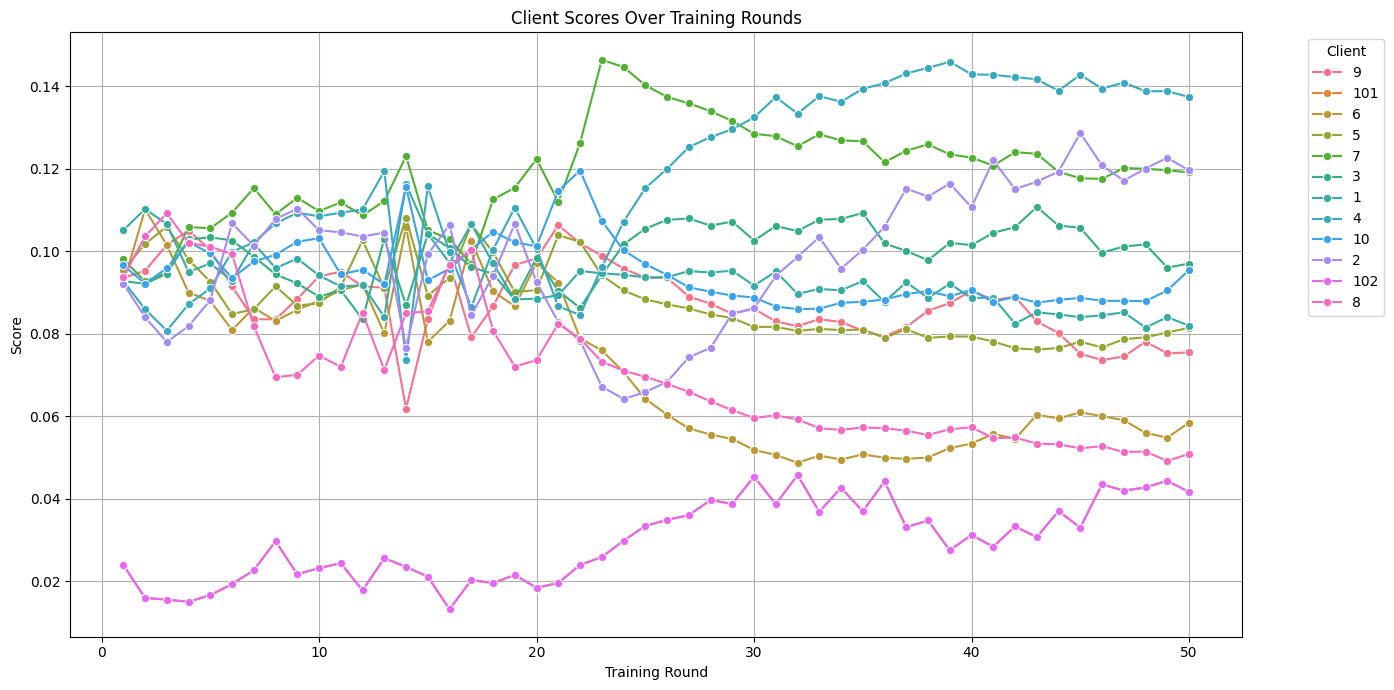

In [4]:
# plot 
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# save client memory
with open("client_memory_round.json", 'r') as f:
    data = json.load(f)

# Convert JSON data to a DataFrame
df = pd.DataFrame(data).T

# Reset index to have a column for 'Round'
df.reset_index(inplace=True)
df = df.rename(columns={'index': 'Round'})

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='Round', var_name='Client', value_name='Score')

# Convert the 'Round' column to numeric
df_melted['Round'] = pd.to_numeric(df_melted['Round'])

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_melted, x='Round', y='Score', hue='Client', marker='o')
plt.title('Client Scores Over Training Rounds')
plt.xlabel('Training Round')
plt.ylabel('Score')
plt.legend(title='Client', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Save the plot as a high-resolution image for scientific papers
plt.savefig('client_scores_plot_cifar10.png', dpi=300)
plt.show()

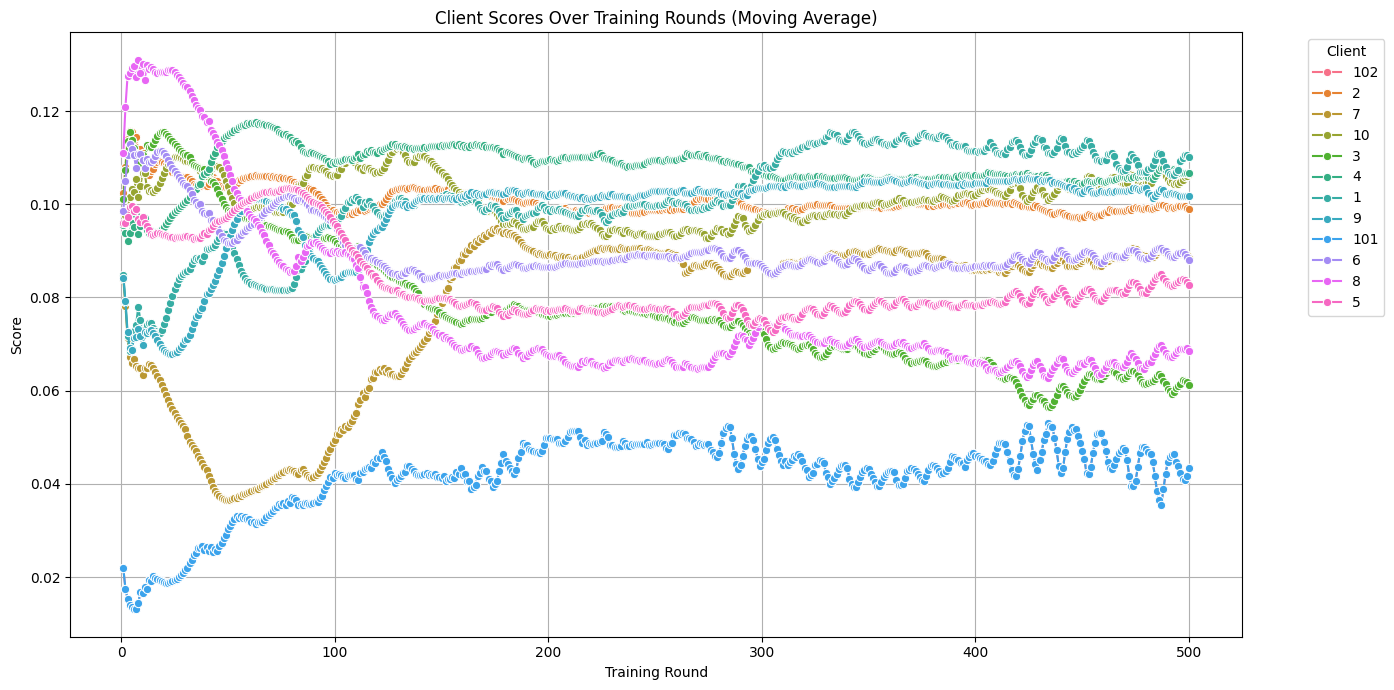

In [11]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# save client memory
with open("client_memory_round.json", 'r') as f:
    data = json.load(f)
    
# Function to calculate the moving average
def calculate_moving_average(data, window_size):
    df = pd.DataFrame(data).T
    df.fillna(0, inplace=True)
    moving_averages = df.apply(lambda x: x.rolling(window=window_size, min_periods=1).mean())
    return moving_averages

# Parameters
window_size = 30  # Set your desired window size here

# Calculate moving averages
df_moving_avg = calculate_moving_average(data, window_size)

# Reset index to have a column for 'Round'
df_moving_avg.reset_index(inplace=True)
df_moving_avg = df_moving_avg.rename(columns={'index': 'Round'})

# Melt the DataFrame for seaborn
df_melted_moving_avg = df_moving_avg.melt(id_vars='Round', var_name='Client', value_name='Score')

# Convert the 'Round' column to numeric
df_melted_moving_avg['Round'] = pd.to_numeric(df_melted_moving_avg['Round'])

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_melted_moving_avg, x='Round', y='Score', hue='Client', marker='o')
plt.title('Client Scores Over Training Rounds (Moving Average)')
plt.xlabel('Training Round')
plt.ylabel('Score')
plt.legend(title='Client', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Save the plot as a high-resolution image for scientific papers
plt.savefig('client_scores_plot_moving_avg_.png', dpi=300)
plt.show()

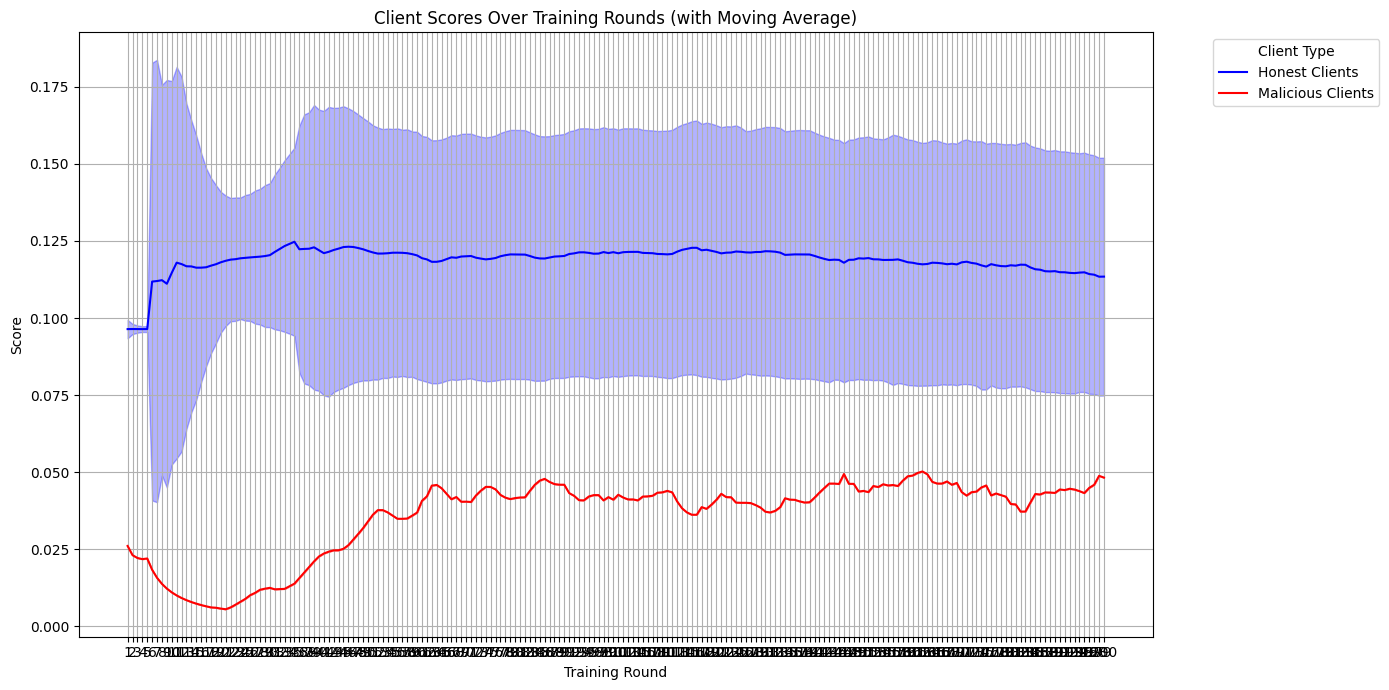

In [18]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# save client memory
with open("client_memory_round_cifar10_1.json", 'r') as f:
    data = json.load(f)

# Function to calculate the moving average
def calculate_moving_average(data, window_size):
    df = pd.DataFrame(data).T
    df.fillna(0, inplace=True)
    moving_averages = df.apply(lambda x: x.rolling(window=window_size, min_periods=1).mean())
    return moving_averages

# Function to plot the moving average
def plot_moving_average(args, df_moving_avg, honest_clients, malicious_clients):
    # Calculate the mean score for honest and malicious clients
    df_moving_avg['Honest'] = df_moving_avg[honest_clients].mean(axis=1)
    df_moving_avg['Malicious'] = df_moving_avg[malicious_clients].mean(axis=1)

    # Calculate the standard deviation for confidence interval
    df_moving_avg['Honest_std'] = df_moving_avg[honest_clients].std(axis=1)
    df_moving_avg['Malicious_std'] = df_moving_avg[malicious_clients].std(axis=1)

    # Reset index to have a column for 'Round'
    df_moving_avg.reset_index(inplace=True)
    df_moving_avg = df_moving_avg.rename(columns={'index': 'Round'})

    # Plotting
    plt.figure(figsize=(14, 7))

    # Honest clients plot with confidence interval
    plt.plot(df_moving_avg['Round'], df_moving_avg['Honest'], label='Honest Clients', color='blue')
    plt.fill_between(df_moving_avg['Round'], df_moving_avg['Honest'] - df_moving_avg['Honest_std'],
                     df_moving_avg['Honest'] + df_moving_avg['Honest_std'], color='blue', alpha=0.3)

    # Malicious clients plot with confidence interval
    plt.plot(df_moving_avg['Round'], df_moving_avg['Malicious'], label='Malicious Clients', color='red')
    plt.fill_between(df_moving_avg['Round'], df_moving_avg['Malicious'] - df_moving_avg['Malicious_std'],
                     df_moving_avg['Malicious'] + df_moving_avg['Malicious_std'], color='red', alpha=0.3)

    plt.title('Client Scores Over Training Rounds (with Moving Average)')
    plt.xlabel('Training Round')
    plt.ylabel('Score')
    plt.legend(title='Client Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()

    # Save the plot as a high-resolution image for scientific papers
    # plt.savefig(f'client_scores_plot_moving_avg_{args.dataset}_{args.fold}.png', dpi=300)
    plt.show()

# Separate clients into honest and malicious
honest_clients = ['1', '2', '3', '4', '5']  # Define your honest client IDs
malicious_clients = ['101', '102']  # Define your malicious client IDs

# Parameters
window_size = 30  # Set your desired window size here

# Calculate moving averages
df_moving_avg = calculate_moving_average(data, window_size)

# Arguments mockup
class Args:
    def __init__(self, dataset, fold):
        self.dataset = dataset
        self.fold = fold

args = Args(dataset='sample_dataset', fold='1')

# Plot the moving averages
plot_moving_average(args, df_moving_avg, honest_clients, malicious_clients)

/var/folders/zx/c94b09b50v31fk6qp9h3h1cw0000gn/T/ipykernel_2294/3404151608.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df_melted, x='Round', y='Score', hue='Client Type', ci='sd', marker='o')


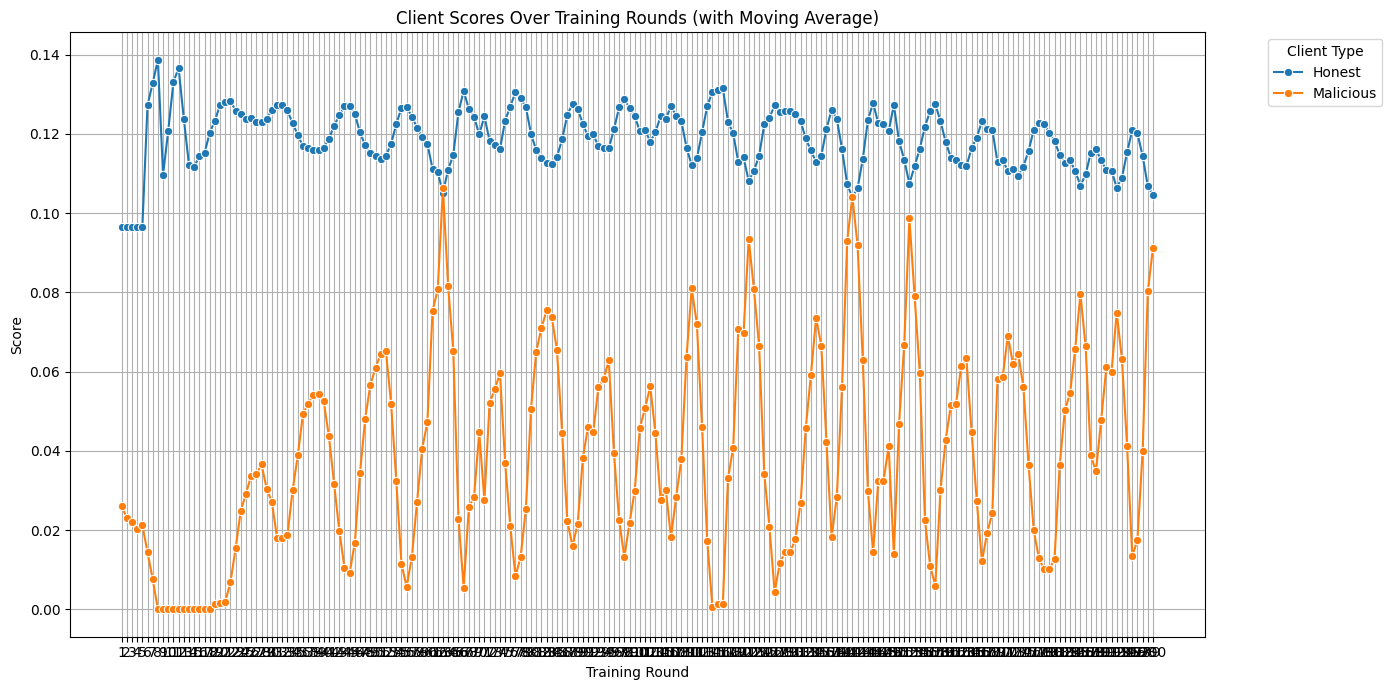

In [16]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# Function to calculate the moving average
def calculate_moving_average(data, window_size):
    df = pd.DataFrame(data).T
    df.fillna(0, inplace=True)
    moving_averages = df.apply(lambda x: x.rolling(window=window_size, min_periods=1).mean())
    return moving_averages

# Function to plot the moving average
def plot_moving_average(args, df_moving_avg, honest_clients, malicious_clients):
    # Calculate the mean score for honest and malicious clients
    df_moving_avg['Honest'] = df_moving_avg[honest_clients].mean(axis=1)
    df_moving_avg['Malicious'] = df_moving_avg[malicious_clients].mean(axis=1)

    # Calculate the standard deviation for confidence interval
    df_moving_avg['Honest_std'] = df_moving_avg[honest_clients].std(axis=1)
    df_moving_avg['Malicious_std'] = df_moving_avg[malicious_clients].std(axis=1)

    # Reset index to have a column for 'Round'
    df_moving_avg.reset_index(inplace=True)
    df_moving_avg = df_moving_avg.rename(columns={'index': 'Round'})

    # Melt the DataFrame for seaborn
    df_melted = df_moving_avg.melt(id_vars='Round', value_vars=['Honest', 'Malicious'], 
                                   var_name='Client Type', value_name='Score')

    # Create a new DataFrame for the standard deviation values
    df_std = df_moving_avg.melt(id_vars='Round', value_vars=['Honest_std', 'Malicious_std'], 
                                var_name='Client Type', value_name='Std')

    # Merge the dataframes to have std values in the same dataframe
    df_melted['Std'] = df_std['Std']

    # Plotting
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=df_melted, x='Round', y='Score', hue='Client Type', ci='sd', marker='o')

    plt.title('Client Scores Over Training Rounds (with Moving Average)')
    plt.xlabel('Training Round')
    plt.ylabel('Score')
    plt.legend(title='Client Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()

    # Save the plot as a high-resolution image for scientific papers
    plt.savefig(f'client_scores_plot_moving_avg_{args.dataset}_{args.fold}.png', dpi=300)
    plt.show()

# Separate clients into honest and malicious
honest_clients = ['1', '2', '3', '4', '5']  # Define your honest client IDs
malicious_clients = ['101', '102']  # Define your malicious client IDs

# Parameters
window_size = 3  # Set your desired window size here

# Calculate moving averages
df_moving_avg = calculate_moving_average(data, window_size)

# Arguments mockup
class Args:
    def __init__(self, dataset, fold):
        self.dataset = dataset
        self.fold = fold

args = Args(dataset='sample_dataset', fold='1')

# Plot the moving averages
plot_moving_average(args, df_moving_avg, honest_clients, malicious_clients)

In [20]:
# save client memory
with open("client_memory_round_cifar10_1.json", 'r') as f:
    data = json.load(f)

# Function to calculate the moving average
def calculate_moving_average(data, window_size):
    df = pd.DataFrame(data).T
    df.fillna(0, inplace=True)
    moving_averages = df.apply(lambda x: x.rolling(window=window_size, min_periods=1).mean())
    return moving_averages

averaged_data = calculate_moving_average(data, 30)

In [22]:
averaged_data_honest = averaged_data[['1', '2', '3', '4', '5']]
averaged_data_malicious = averaged_data[['101', '102']]

/var/folders/zx/c94b09b50v31fk6qp9h3h1cw0000gn/T/ipykernel_2294/1085228031.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=combined_data, x='variable', y='value', hue='type', ci=95)


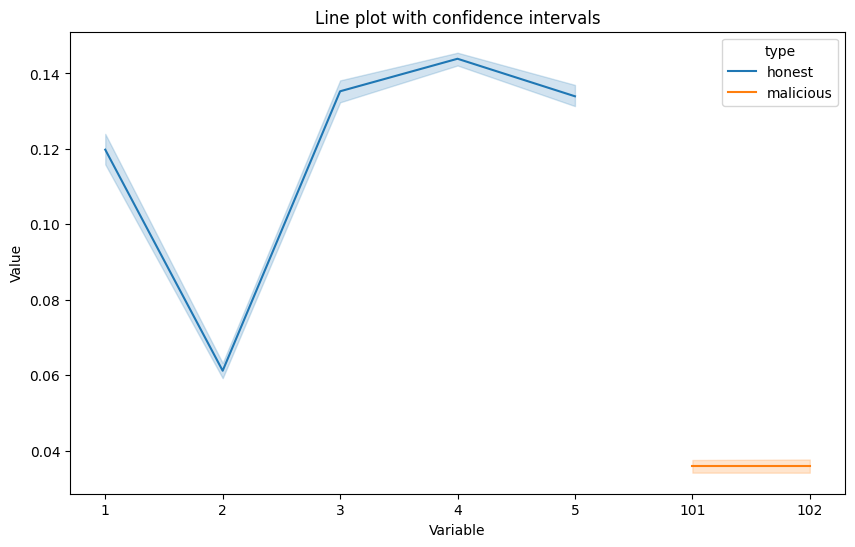

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Combine the data into a single DataFrame
averaged_data_honest = averaged_data_honest.melt(var_name='variable', value_name='value')
averaged_data_malicious = averaged_data_malicious.melt(var_name='variable', value_name='value')

# Add a column to indicate the type
averaged_data_honest['type'] = 'honest'
averaged_data_malicious['type'] = 'malicious'

# Combine the datasets
combined_data = pd.concat([averaged_data_honest, averaged_data_malicious])

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_data, x='variable', y='value', hue='type', ci=95)
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Line plot with confidence intervals')
plt.show()

type
honest       2000
malicious     400
dtype: int64


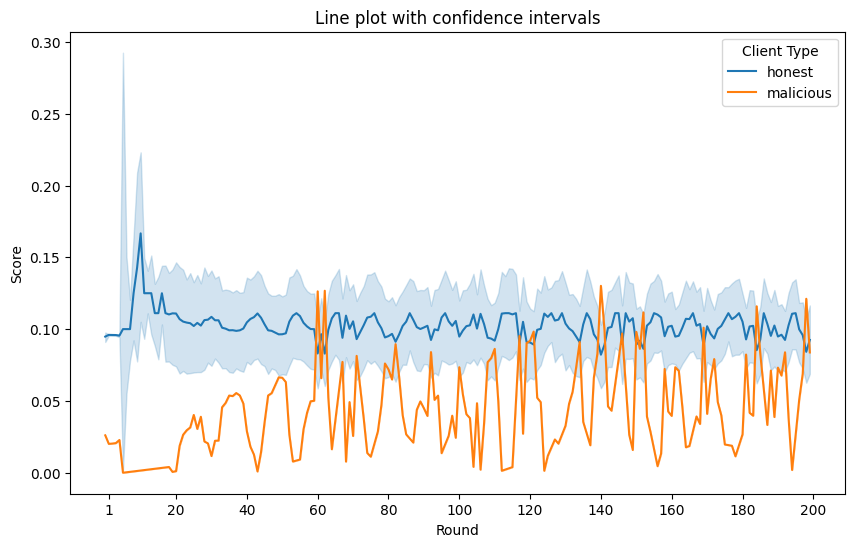

In [37]:
data = []
for i in range(5):
    # save client memory
    with open(f"client_memory_round_cifar10_{i}.json", 'r') as f:
        data.append(json.load(f))


# Convert the JSON data into a DataFrame
df = pd.DataFrame(data).T

# Create a long-form DataFrame
df_long = df.reset_index().melt(id_vars='index', var_name='variable', value_name='value')
df_long.rename(columns={'index': 'round'}, inplace=True)

# Add a column to indicate whether the data is "honest" or "malicious"
df_long['type'] = df_long['variable'].apply(lambda x: 'malicious' if int(x) >= 101 else 'honest')

# Ensure there are enough data points for each group
print(df_long.groupby('type').size())

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='round', y='value', hue='type', errorbar=('ci', 95))
plt.xlabel('Round')
plt.ylabel('Score')
# plt.grid(True)
plt.legend(title='Client Type')
plt.title('Line plot with confidence intervals')

# Set x-ticks to show every 20 rounds
round_labels = [1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
plt.xticks(ticks=round_labels, labels=round_labels)

plt.show()

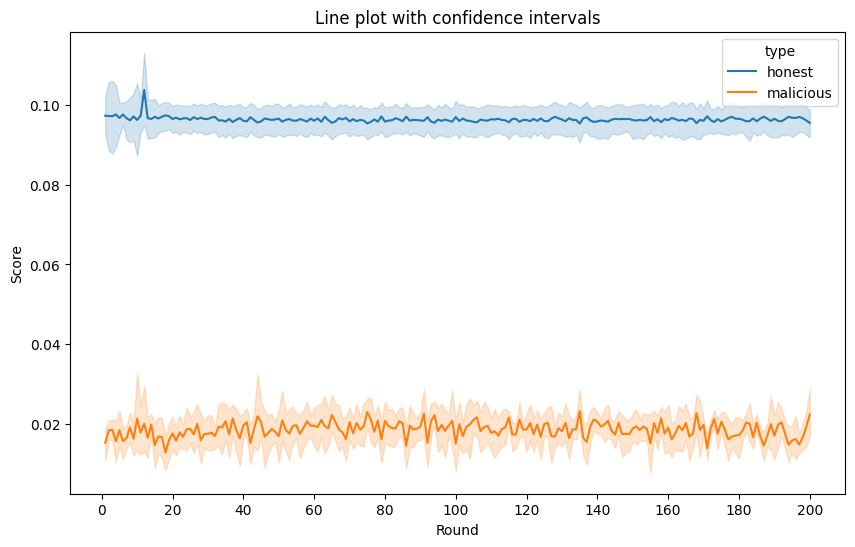

In [43]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a list to hold data from all folds
combined_data = {}

# Read and combine data from all 5 folds
for i in range(1, 5):
    with open(f"score_trends/MP_noise/client_memory_round_cifar10_{i}.json", 'r') as f:
        fold_data = json.load(f)
        for round_key, round_data in fold_data.items():
            if round_key not in combined_data:
                combined_data[round_key] = {}
            for client_key, value in round_data.items():
                new_client_key = int(client_key) + i * 10 if int(client_key) <= 10 else int(client_key) + i * 2
                new_client_key = str(new_client_key)
                combined_data[round_key][new_client_key] = value

# Convert the combined data into a DataFrame
df = pd.DataFrame(combined_data).T

# Create a long-form DataFrame
df_long = df.reset_index().melt(id_vars='index', var_name='variable', value_name='value')
df_long.rename(columns={'index': 'round'}, inplace=True)

# Add a column to indicate whether the data is "honest" or "malicious"
df_long['type'] = df_long['variable'].apply(lambda x: 'malicious' if int(x) >= 101 else 'honest')

# Convert 'round' to numeric type for sorting
df_long['round'] = df_long['round'].astype(int)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='round', y='value', hue='type', errorbar=('ci', 95))
plt.xlabel('Round')
plt.ylabel('Score')
plt.title('Line plot with confidence intervals')

# Set x-ticks to show every 20 rounds starting from 0
max_round = df_long['round'].max()
plt.xticks(ticks=range(0, max_round + 1, 20), labels=range(0, max_round + 1, 20))

plt.show()

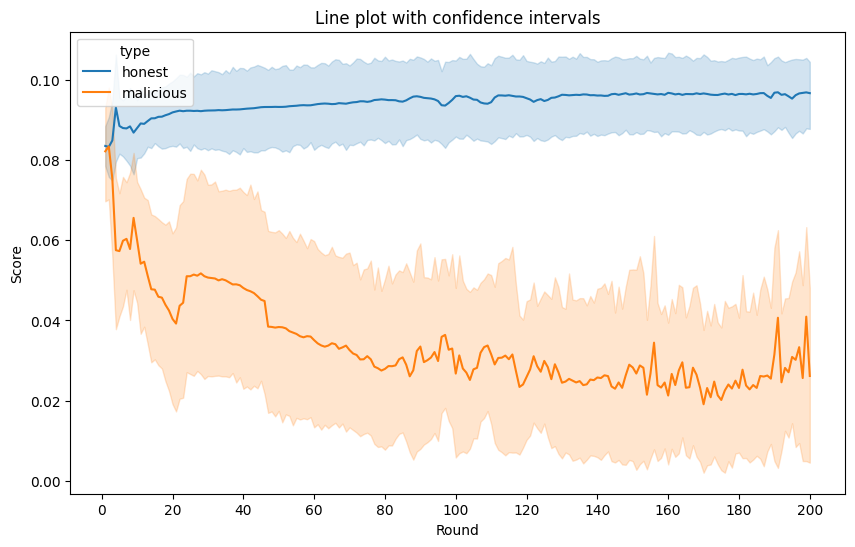

In [47]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a list to hold data from all folds
combined_data = {}

# Read and combine data from all 5 folds
for i in range(1, 5):
    with open(f"score_trends/DP_flip/client_memory_round_cifar10_{i}.json", 'r') as f:
        fold_data = json.load(f)
        for round_key, round_data in fold_data.items():
            if round_key not in combined_data:
                combined_data[round_key] = {}
            for client_key, value in round_data.items():
                new_client_key = int(client_key) + i * 10 if int(client_key) <= 10 else int(client_key) + i * 2
                new_client_key = str(new_client_key)
                combined_data[round_key][new_client_key] = value

# Convert the combined data into a DataFrame
df = pd.DataFrame(combined_data).T

# Create a long-form DataFrame
df_long = df.reset_index().melt(id_vars='index', var_name='variable', value_name='value')
df_long.rename(columns={'index': 'round'}, inplace=True)

# Add a column to indicate whether the data is "honest" or "malicious"
df_long['type'] = df_long['variable'].apply(lambda x: 'malicious' if int(x) >= 101 else 'honest')

# Convert 'round' to numeric type for sorting
df_long['round'] = df_long['round'].astype(int)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='round', y='value', hue='type', errorbar=('ci', 95))
plt.xlabel('Round')
plt.ylabel('Score')
plt.title('Line plot with confidence intervals')

# Set x-ticks to show every 20 rounds starting from 0
max_round = df_long['round'].max()
plt.xticks(ticks=range(0, max_round + 1, 20), labels=range(0, max_round + 1, 20))

plt.show()